In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
data = pd.read_csv("anova_data.csv")
data.head()

,revenue,group
0,4.525935,PlanA
1,0.878853,PlanA
2,3.504461,PlanA
3,0.217820,PlanA
4,2.783135,PlanA


In [13]:
data.describe()

,revenue
count,30.000000
mean,3.326038
std,1.287051
min,0.217820
25%,2.704014
50%,3.458051
75%,4.467989
max,4.869651


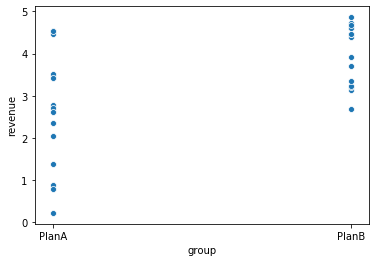

In [59]:
sns.scatterplot(x = "group"
                , y = "revenue"
                , data = data)
plt.show()

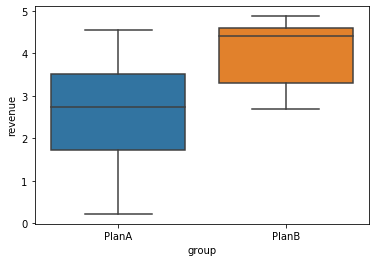

In [60]:
sns.boxplot(x = "group"
              , y = "revenue"
              , data = data)

***Observatiion***: PlanA and Plan B are significant difference.

**One-way ANOVA**

The one-way ANOVA tests the null hypothesis that group A and group B have the same population mean

In [75]:
from scipy.stats import f_oneway

In [76]:
data_A = data[data["group"] == "PlanA"]["revenue"].values

data_B = data[data["group"] == "PlanB"]["revenue"].values

F_value, p_value = f_oneway(data_A, data_B)

print("F-value : ", F_value)

print("p-value : ", p_value)

F-value :  11.273741771839623
p-value :  0.002277863216005569


**Observation**: p_value = 0.2%, the confidence is greater than 95% so that we can reject null hypotheis that group A and group B have same population mean

**Q-Q Plot**

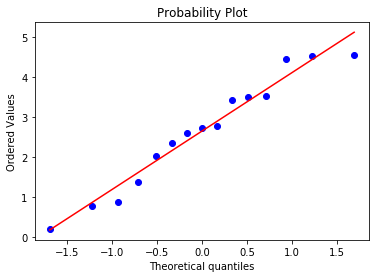

In [79]:
data_A = data[data["group"] == "PlanA"]["revenue"].values

stats.probplot(data_A, dist="norm", plot=pylab)

pylab.show()

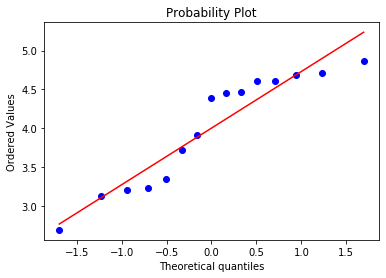

In [80]:
data_B = data[data["group"] == "PlanB"]["revenue"].values

stats.probplot(data_B, dist="norm", plot=pylab)

pylab.show()

### Leven Test

The Levene test tests the null hypothesis that all input samples are from populations with equal variances

In [34]:
from scipy.stats import levene

In [93]:
data_A = data[data["group"] == "PlanA"]["revenue"].values

data_B = data[data["group"] == "PlanB"]["revenue"].values

levene(data_A, data_B)

LeveneResult(statistic=3.883226068788937, pvalue=0.058730752064320275)

**Observation**: p_value = 0.05 -> confidence = 95%. So we can conclude that data from Group A and Group B is from different population

### Residues

Text(0.5, 1.0, 'Residual bewteen Group A and Group B')

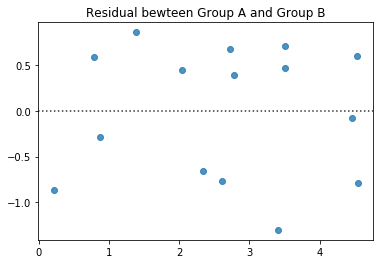

In [95]:
_ = sns.residplot(data_A, data_B)
plt.title("Residual bewteen Group A and Group B")

**Observation**: Group A and Group B is not correlated

### Shapiro-Wilk

In [38]:
from scipy.stats import shapiro

In [73]:
A = data[data["group"] == "PlanA"]["revenue"].values

statistic, p_value = shapiro(A)

print("Group A: p-value = ", p_value)

Group A: p-value =  0.45322489738464355


In [74]:
B = data[data["group"] == "PlanB"]["revenue"].values

statistic, p_value = shapiro(B)

print("Group B: p-value = ", p_value)

Group B: p-value =  0.05421371012926102


***Observation***:

- p_value of group A equals 45%, the significance is 55%. We cannot reject the null hypothesis that data in group A is normal distribution.
- In contrast, in group B, p_value = 5% -> confidence = 95%, we reject NH hypothesis that data in group B is normally distributed.

### Q-Q plot

In [45]:
from scipy import stats
import pylab

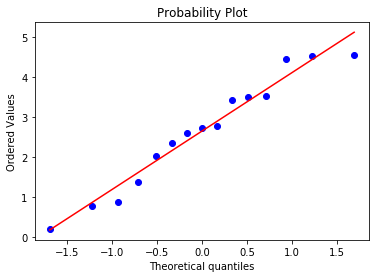

In [82]:
data_A = data[data["group"] == "PlanA"]["revenue"].values

stats.probplot(data_A, dist="norm", plot=pylab)

pylab.show()

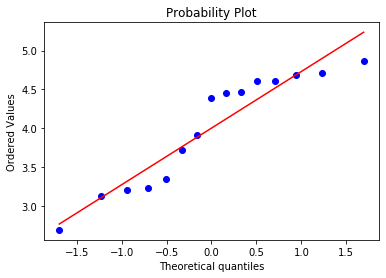

In [83]:
data_B = data[data["group"] == "PlanB"]["revenue"].values

stats.probplot(data_B, dist="norm", plot=pylab)
pylab.show()

In [92]:


model = sm.OLS(data_A, data_B).fit()

model.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              47.35
Date:                Fri, 06 Mar 2020   Prob (F-statistic):                    7.55e-06
Time:                        15:19:05   Log-Likelihood:                         -26.526
No. Observations:                  15   AIC:                                      55.05
Df Residuals:                      14   BIC:                                      55.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6419      0.093      6.881      0.000       0.442       0.842
==============================================================================
Omnibus:                        1.327   Durbin-Watson:                   2.573
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.795
Skew:                          -0.014   Prob(JB):                        0.672
Kurtosis:                       1.873   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""